### Importaciones de las librerias.

In [10]:
# import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential 
from keras.layers import Dense
from keras.optimizers import SGD

### Lectura del archivo csv y definir los datos para el analisis

In [ ]:
data_set = pd.read_csv("DatosBateria.csv", sep=",")

y = data_set["bateria"].values
x = data_set["minutos"].values

print(x)
print(y)

[ 0  4  8 12 16 20 24 28 32 36 40 44 48]
[ 5 10 14 19 24 28 33 38 42 47 52 56 61]


### Configuracion del modelo.

In [27]:

# * tamaño de la entrada de datos
input_dim = 1
# * tamaño de la salida de datos
output_dim = 1

modelo = Sequential()
modelo.add(Dense(output_dim, input_dim=input_dim, activation='linear'))

# * tasa de aprendizaje 
sgd = SGD(learning_rate=0.001)

# * definir la funcion de perdida y el optimizador (error cuadratico medio = mse)
modelo.compile(loss="mse", optimizer=sgd)

modelo.summary()

num_epochs = 200
batch_size = x.shape[0] 

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento del modelo.

In [29]:
history = modelo.fit(x,y, epochs=num_epochs, batch_size=batch_size, verbose=1)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 101.4796
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 41.2718
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 19.4877
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 11.6027
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 8.7454
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 7.7067
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 7.3260
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 7.1833
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 7.1266
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 7.1011
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 7.0868
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 7.0767
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 7.0680
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 7.0599
Epoch 15/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 7.0519
Epoch 16/200


Graficar la perdida del modelo y la regresion lineal

Parametros: w = 1.3, b = 0.5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Text(0.5, 1.0, 'Datos originales y regresion lienal')

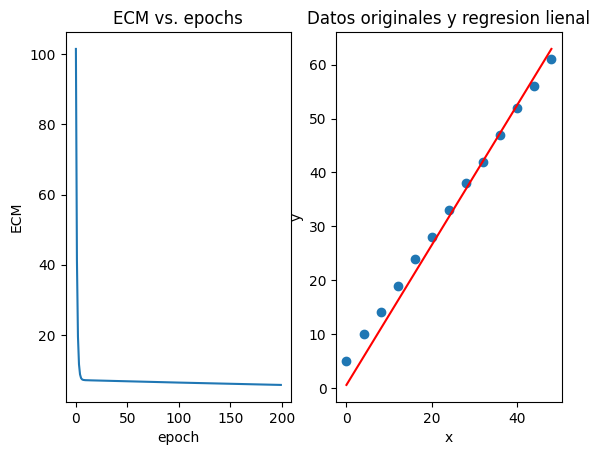

In [ ]:
capas = modelo.layers[0]
w, b = capas.get_weights()
print("Parametros: w = {:.1f}, b = {:.1f}".format(w[0][0], b[0]))

plt.subplot(1,2,1)
plt.plot(history.history["loss"])
plt.xlabel("epoch")
plt.ylabel("ECM")
plt.title("ECM vs. epochs")

y_regr = modelo.predict(x)
plt.subplot(1,2,2)
plt.scatter(x,y)
plt.plot(x,y_regr, "r")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Datos originales y regresion lineal")

### Prueba de prediccion

In [30]:

x_pred = np.array([48])
y_pred = modelo.predict(x_pred)
print("La prediccion sera: ", y_pred )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
La prediccion sera:  [[62.938587]]
